In [ ]:
from yolov5 import Darknet
from camera import LoadStreams, LoadImages
from utils.general import non_max_suppression, scale_boxes, check_imshow
from utils.dataloaders import letterbox
import json

with open('yolov5_config.json', 'r', encoding='utf8') as fp:
    opt = json.load(fp)
source = opt['source']='static\\test.png'
darknet = Darknet(opt)
dataset = LoadImages(source, img_size=opt["imgsz"], stride=darknet.stride)
darknet.detect(dataset=dataset)


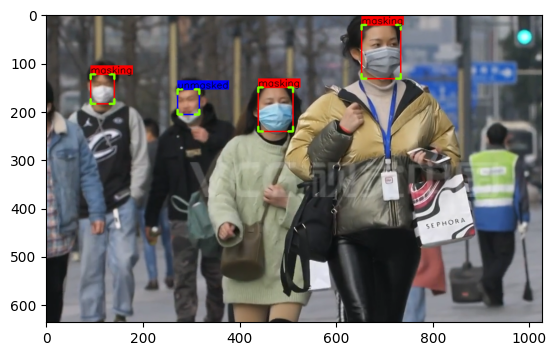

(272, 155, 317, 207, 'unmasked', 0.864)


In [2]:

import random
import cv2
from matplotlib import pyplot as plt


def draw_box_corner(draw_img, bbox, length, corner_color):
    # Top Left
    cv2.line(draw_img, (bbox[0], bbox[1]), (bbox[0] +
             length, bbox[1]), corner_color, thickness=3)
    cv2.line(draw_img, (bbox[0], bbox[1]), (bbox[0],
             bbox[1] + length), corner_color, thickness=3)
    # Top Right
    cv2.line(draw_img, (bbox[2], bbox[1]), (bbox[2] -
             length, bbox[1]), corner_color, thickness=3)
    cv2.line(draw_img, (bbox[2], bbox[1]), (bbox[2],
             bbox[1] + length), corner_color, thickness=3)
    # Bottom Left
    cv2.line(draw_img, (bbox[0], bbox[3]), (bbox[0] +
             length, bbox[3]), corner_color, thickness=3)
    cv2.line(draw_img, (bbox[0], bbox[3]), (bbox[0],
             bbox[3] - length), corner_color, thickness=3)
    # Bottom Right
    cv2.line(draw_img, (bbox[2], bbox[3]), (bbox[2] -
             length, bbox[3]), corner_color, thickness=3)
    cv2.line(draw_img, (bbox[2], bbox[3]), (bbox[2],
             bbox[3] - length), corner_color, thickness=3)

 # Plotting functions


def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(
        0.001 * max(img.shape[0:2])) + 1  # line thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(
            label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1)  # filled
        point = [x[0], x[1], x[2], x[3]]
        draw_box_corner(img, point, 10, (0, 255, 128))
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3,
                    [0, 0, 0], thickness=tf, lineType=cv2.LINE_AA)


source = 'static\\test.png'
img = cv2.imread(source)
predarr = [(439, 151, 511, 242, 'masking', 0.91),
           (653, 22, 734, 133, 'masking', 0.904),
           (92, 124, 141, 185, 'masking', 0.866),
           (272, 155, 317, 207, 'unmasked', 0.864)]
for item in predarr:
    box_color = (0, 0, 255) if item[4] == 'masking' else (255, 0, 0)
    plot_one_box(item, img, box_color, item[4])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(item)


In [20]:
label = "masking: 0.639"
result = label.split(':')[0]
result

'masking'

In [3]:
import torch
X = torch.arange(16,dtype=torch.float32).reshape(1,1,4,4)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [13]:
print(torch.nn.MaxPool2d(kernel_size=2)(X))
print(torch.nn.MaxPool2d(kernel_size=3,stride=3,padding=1)(X))
print(torch.nn.MaxPool2d(3)(X))

tensor([[[[ 5.,  7.],
          [13., 15.]]]])
tensor([[[[ 5.,  7.],
          [13., 15.]]]])
tensor([[[[10.]]]])


In [29]:
import torch
from torch import nn
from d2l import torch as d2l


class Reshape(torch.nn.Module): 
    def forward(self, x):
        return x.view(-1, 1, 28, 28)


net = torch.nn.Sequential(
    Reshape(), nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(400, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10)
)


In [27]:
X = torch.rand(size=(1,1,28,28),dtype=torch.float32).cuda()
for layer in net:
    X = layer(X)
    # 经常查看输入输出通道数的大小关系
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Reshape output shape:	 torch.Size([1, 1, 28, 28])
Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [28]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



loss 0.474, train acc 0.820, test acc 0.808
19135.0 examples/sec on cuda:0


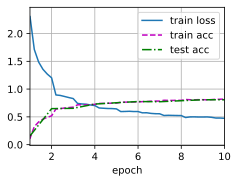

In [33]:
lr,num_epochs = 0.9,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

In [34]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

In [35]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [40]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [1]:
import torch
from torch import nn
from d2l import torch as d2l


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [4]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10)
    )

net = vgg(conv_arch)
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])
